# Web Visualization Module 2: Twitter Scraping

## 1. Intro

Twitter collects a *lot* of data. Ranging from tweets themselves, to data on users, to data on likes and other interactions, Twitter basically records everything that happens on their website. Lucky for data scientists like ourselves, Twitter also shares that data with us! In this assignment, we're going to use Twitter's Python API to analyze retweet statistics, demographics, and some other data too!

## 2. Importing Libraries

Other people are also interested in analyzing Twitter data, so there's been work done here already. That means other folks have developed useful collections of code — called libraries — which handle a lot of parsing and data management, so that we don't have to. Since these libraries are published online, we have access to all that hard work too! That means we can use code from those libraries to handle all the complicated Twitter models, so we only have to worry about the actual analysis (which is the fun part).

You don't need to worry too much about the code in the next cell. It's purpose is to import libraries that other people have written, so that we have access to them later on.

In [1]:
!pip install tweepy    # This lets us access Twitter data.
!pip install textblob  # This will help us parse text.
!pip install plotly    # This makes it easy to plot graphs.
!pip install nltk      # This is also to parse text.

  Using cached requests_oauthlib-0.8.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 634kB 1.2MB/s ta 0:00:011
    100% |████████████████████████████████| 1.2MB 865kB/s ta 0:00:011
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /Users/sequoia/Library/Caches/pip/wheels/79/8b/2a/b2da7fce57a1fd9b20b08fa8800c83b6fde62af9e880722e29
Successfully built nltk
    100% |████████████████████████████████| 1.0MB 978kB/s ta 0:00:011
    100% |████████████████████████████████| 163kB 4.2MB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 7.0MB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 6.7MB/s eta 0:00:01
  Using cached enum34-1.1.6-py2-none-any.whl
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /Users/sequoia/Library/Caches/pip/wheels/c9/c4/00/a80b040dd8c9301d29f7153881c96edf1cd8561977ec440941
Successfully built plotly


## 3. Accessing the Data

To work on Twitter data, we'll first need two things: a Twitter account, and Twitter keys. Here are the steps to follow:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
1. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.
1. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
1. On the page for that application, find your Consumer Key and Consumer Secret. Don't lose these!
1. On the same page, create an Access Token. Record the resulting Access Token and Access Token Secret. Don't lose these either!

**Security concern: Do not share your access keys with anyone. They can be used to manage your Twitter account without your permission.**

Add your credentials in the cell below. Your program will use them to access Twitter data.

In [2]:
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

The next cell will authorize your program to request Twitter data, through the developer account you just set up.

In [ ]:
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

**Note**: A lot of data scientists like Twitter data. As a result, you can only request data approximately once every 15 minutes to keep Twitter's servers from crashing due to too much activity. Use your requests wisely to avoid unnecessary waiting time.

Now that everything is set up, we can use [Twitter's search API](https://dev.twitter.com/rest/reference/get/search/tweets) to find the word "Berkeley". This will give us the same results as using [Twitter's online "search" page](https://twitter.com/search?q=berkeley).

In [4]:
results = tweepy.Cursor(api.search,   # `api.search` specifies we want to perform a search.
                        q='Berkeley', # `q` is the query, or the words we're searching for.
                        result_type='recent') # We'll prioritize more recent results first.

NameError: name 'tweepy' is not defined

Now `results` is a long list of search results. Since it is actually pretty extensive, let's just take the first ten results. In the next cell we build up a list called `first_ten`, which contains just the first ten tweets we found in `results`.

In [7]:
first_ten = []                  # We start out with an empty list called `first_ten`.
for tweet in results.items(10): # Then, we'll iterate over the first 10 tweets in `results`...
    first_ten.append(tweet)     # And we'll add each of those tweets to `first_ten`.

NameError: name 'results' is not defined

Now lets have a peek at what the data looks like. 

In [33]:
print(first_ten)

## 4. Exploring the Dataset

Twitter gives us a lot of information about each tweet, not just its text. You can read about all the details [here](https://dev.twitter.com/overview/api/tweets). Let's look at one tweet to get a sense of the information we have available. We can access just the first tweet in our list by indexing into it. Note, the first index in the list is actually 0, not 1, so we will actually say `first_ten[0]` to see the first tweet in our list of ten tweets.

In [6]:
print(first_ten[0]) # Try changing this to any number 0-9, to see other tweets in the list.

IndexError: list index out of range

### Question 1:
Which field contains each of the following attributes:
1. The tweet's text?
1. The time when the tweet was posted?
1. The geographic location of the tweet?
1. The source (device and app) where the tweet was written?

**Answer:**
1. 
1. 
1. 
1. 

## 5. Analyzing the Dataset

It's time to do analysis! Let's start out by getting a list, where each entry corresponds to how many retweets we got in the first 

In [17]:
retweet_counts = []                      # We start with an empty list called `retweet_counts`.
for tweet in first_ten:                  # Then, we iterate over the tweets in `first_ten`...
    retweet_count = tweet.retweet_count  # And, for each tweet, get the number of retweets...
    retweet_counts.append(retweet_count) # And append that number to our list `retweet_counts`.
    
print(retweet_counts)

[4543, 0, 1, 3214, 1054, 15, 1, 34, 0, 0]


Let's try and draw it:

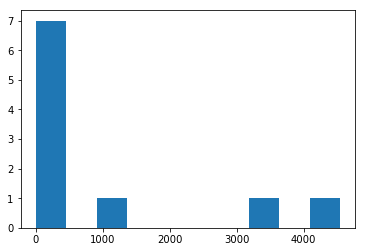

In [19]:
import matplotlib.pyplot as plt
plt.hist(retweet_counts)
plt.show()

Twitter search api provides three modes (check out this guide) for the result_type: mix, recent, and popular. In the previous code, we retrieved the popular tweets. 
Now it is your turn to retrieve recent 100 tweets and assign them to a new variable (e.g., results_recent100), then plot a histogram for the retweet count of the recent 100 tweets. 


#### Question 2 
Compare and contrast between the two histograms for retweet counts of recent and popular 100 tweets that returns from searching the word Berkeley. 


**Answer**: 

#### Question 3.
Twitter search api has an option to limit the search by geo location. The parameter value is specified by ”latitude,longitude,radius”. Compare the top 10 popular tweets text from four geo locations: Berkeley, Kansas City, New York, and Barcelona Spain.


**Answer**: 

### User handles
Instead of searching for tweets, you can use Twitter APIs to get details about specific user account. It includes user’s timeline, followers, etc.

Get the latest 10 tweets from an account that interests you (e.g.,  UCBerkeley) twitter account using the following code.

In [20]:
handle_results = api.user_timeline(screen_name='UCBerkeley', count=10)

handle_results_tweets = []

for t in handle_results:
    handle_results_tweets.append(t)

In [21]:
#print the test of the first 10 tweets
for t in handle_results_tweets:
    print(t.created_at.strftime("%Y-%b-%d %H:%M"))
    print(t.text)
    print()

2017-Sep-01 03:02
NEXT WEEK: 50 years of protest photos to open @ucbsoj https://t.co/A6pvEsWERd j https://t.co/GQzQ4Ptybf

2017-Sep-01 02:07
Distant galaxy sends out 15 high-energy radio bursts https://t.co/v01bqRNumR https://t.co/BY99a6IDk9

2017-Sep-01 01:03
BLOG: On sexism in economics https://t.co/AlzpF6SqWT https://t.co/SjwTRyZRGb

2017-Aug-31 23:54
RT @berkeleyforum: Join us tonight at 6:00 PM in 112 Wurster as The Berkeley Forum hosts new Chancellor Carol Christ. https://t.co/ZTYYHAVM…

2017-Aug-31 22:04
BLOG: Working outside the #tech bubble https://t.co/8jgkESKfuD #startup https://t.co/51jJkuoh27

2017-Aug-31 19:02
BLOG: #Houston, we all have a problem https://t.co/bd3ODC2oQT #Harvey https://t.co/YVpuXhr9mQ

2017-Aug-31 17:02
FRIDAY: Campus memorial Friday for chief counsel Chris Patti https://t.co/TGNfellJUg https://t.co/DxYQEeAGt5

2017-Aug-31 16:04
Girls’ #STEM camp connects with campus https://t.co/b2UrYFdleK #girlsinstem https://t.co/VJQO9Omlwd

2017-Aug-31 07:04
More tha

#### Question 4
Look at the text of retrieved tweets and compare them to the latest 10 tweets of the [web interface](https://twitter.com/UCBerkeley) for the same user. Do you see any difference? 

**Answer**: 

Get a list of a followers for UCBerkeley.

In [40]:
followers_list = []

followers_results = api.followers(screen_name='UCBerkeley', count=200, page=i)
for f in handle_results:
      followers_list.append(f)

for f in followers_list:
    print(f.name)

NameError: name 'i' is not defined

There’s a limit on how many users can be returned by one request. If you need more, please read [using cursors to navigate collections](https://dev.twitter.com/overview/api/cursoring).

#### Bonus Question
Based on profile_location in the follower data, draw a map for both followers lists for Donald Trump and Hillary Clinton. 


### Submitting the assignment

- Delete your Twitter API credentials, ie. re-assign `consumer_key`, `consumer_secret`, `access_key`, and `access_secret` to empty strings so that we won't see your credentials when you save and sumbit it.
- Save this jupyter notebook as a pdf. Click File, Download as, PDF via LaTex (.pdf).
- Upload the pdf file into bcourses under Assignment 2.